# Import EELS Spectrum Image DM4 files via Hyperspy

In [10]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print('Tensorflow Version:',tf.__version__)

import hyperspy.api_nogui as hs

print('Hyperspy Version:', hs.__version__)

Tensorflow Version: 2.11.0
Hyperspy Version: 1.7.3


In [11]:
from logicalEELS.preprocess import loadDirDM4, findEdgeIndex, alignSpectra, backgroundSubtract, normAUC_inds

In [12]:
DATA_DIR_X = '../../Data/EELS_Data/MXene_Inprocess/MXene_Raw_Rebin_Aligned_All'
DATA_DIR_Y = '../../Data/EELS_Data/MXene_Inprocess/MXene_PCA_Rebin_Aligned_All'

SaveData = True
SAVE_DIR = './data/'

In [13]:
energy_axis, data_X, filenames_raw = loadDirDM4(DATA_DIR_X, crop=(390.0, 790.0))

Files found: 24


Loading 200C_Area1_Raw_Aligned.dm4...


(570, 1600)
Loading 200C_Area3_Raw_Aligned.dm4...


(570, 1600)
Loading 200C_Area4_Raw_Aligned.dm4...


(570, 1600)
Loading 300C_Area1_Raw_Aligned.dm4...


(570, 1600)
Loading 300C_Area3_Raw_Aligned.dm4...
(570, 1600)
Loading 300C_Area4_Raw_Aligned.dm4...


(570, 1600)
Loading 400C_Area1_Raw_Aligned.dm4...
(570, 1600)
Loading 400C_Area3_Raw_Aligned.dm4...


(570, 1600)
Loading 400C_Area4_Raw_Aligned.dm4...
(570, 1600)
Loading 500C_Area1_Raw_Aligned.dm4...


(570, 1600)
Loading 500C_Area3_Raw_Aligned.dm4...
(570, 1600)
Loading 500C_Area4_Raw_Aligned.dm4...


(570, 1600)
Loading 600C_Area1_Raw_Aligned.dm4...
(570, 1600)
Loading 600C_Area3_Raw_Aligned.dm4...


(570, 1600)
Loading 600C_Area4_Raw_Aligned.dm4...
(570, 1600)
Loading 700C_Area1_Raw_Aligned.dm4...


(570, 1600)
Loading 700C_Area3_Raw_Aligned.dm4...
(570, 1600)
Loading 700C_Area4_Raw_Aligned.dm4...


(570, 1600)
Loading 800C_Area1_Raw_Aligned.dm4...
(570, 1600)
Loading 800C_Area3_Raw_Aligned.dm4...


(570, 1600)
Loading 800C_Area4_Raw_Aligned.dm4...
(570, 1600)
Loading Initial_Area1_Raw_Aligned.dm4...


(570, 1600)
Loading Initial_Area3_Raw_Aligned.dm4...
(570, 1600)
Loading Initial_Area4_Raw_Aligned.dm4...


(570, 1600)


In [14]:
_, data_Y, filenames_pca = loadDirDM4(DATA_DIR_Y, crop=(390.0, 790.0))

Files found: 24


Loading 200C_Area1_PCA_Aligned.dm4...


(570, 1600)
Loading 200C_Area3_PCA_Aligned.dm4...
(570, 1600)
Loading 200C_Area4_PCA_Aligned.dm4...


(570, 1600)
Loading 300C_Area1_PCA_Aligned.dm4...
(570, 1600)
Loading 300C_Area3_PCA_Aligned.dm4...


(570, 1600)
Loading 300C_Area4_PCA_Aligned.dm4...
(570, 1600)
Loading 400C_Area1_PCA_Aligned.dm4...


(570, 1600)
Loading 400C_Area3_PCA_Aligned.dm4...
(570, 1600)
Loading 400C_Area4_PCA_Aligned.dm4...


(570, 1600)
Loading 500C_Area1_PCA_Aligned.dm4...
(570, 1600)
Loading 500C_Area3_PCA_Aligned.dm4...


(570, 1600)
Loading 500C_Area4_PCA_Aligned.dm4...
(570, 1600)
Loading 600C_Area1_PCA_Aligned.dm4...


(570, 1600)
Loading 600C_Area3_PCA_Aligned.dm4...
(570, 1600)
Loading 600C_Area4_PCA_Aligned.dm4...


(570, 1600)
Loading 700C_Area1_PCA_Aligned.dm4...
(570, 1600)
Loading 700C_Area3_PCA_Aligned.dm4...


(570, 1600)
Loading 700C_Area4_PCA_Aligned.dm4...


(570, 1600)
Loading 800C_Area1_PCA_Aligned.dm4...


(570, 1600)
Loading 800C_Area3_PCA_Aligned.dm4...


(570, 1600)
Loading 800C_Area4_PCA_Aligned.dm4...
(570, 1600)
Loading Initial_Area1_PCA_Aligned.dm4...


(570, 1600)
Loading Initial_Area3_PCA_Aligned.dm4...
(570, 1600)
Loading Initial_Area4_PCA_Aligned.dm4...


(570, 1600)


In [15]:
def plotSpectra(ax, energy, spectra, window=None, title=None):
    if window!=None:
        inds = findEdgeIndex(energy, window[0], window[1])
    else:
        inds = slice(0,spectra.shape[-1])
    
    for i in range(24):
        ax.plot(energy[inds], spectra[i,300:400,inds].mean(axis=(0)))
        # ax.plot(energy, spectra[i].mean(axis=(0)))
    ax.set_xlabel('Energy Loss (eV)')
    ax.set_ylabel('Average Counts')
    if title!=None:
        ax.set_title(title)
    return ax

In [16]:
ind_Cr = findEdgeIndex(energy_axis, 567.5, 627.5)
ind_norm = findEdgeIndex(energy_axis, 570.0, 592.5)
ind_F = findEdgeIndex(energy_axis, 677.0, 737.0)
ind_F_fit = findEdgeIndex(energy_axis, 650, 680)

data_X_aligned = alignSpectra(energy_axis, data_X, ind_Cr, 570, 570)
data_Y_aligned = alignSpectra(energy_axis, data_Y, ind_Cr, 570, 570)

data_X_aligned_norm = normAUC_inds(energy_axis, data_X_aligned, ind_norm)
data_Y_aligned_norm = normAUC_inds(energy_axis, data_Y_aligned, ind_norm)

data_X_processed = backgroundSubtract(energy_axis, data_X_aligned_norm, ind_F, ind_F_fit)
data_Y_processed = backgroundSubtract(energy_axis, data_Y_aligned_norm, ind_F, ind_F_fit)

scaleFactor = 1//data_Y_processed[0].mean(axis=0).max()
scaleFactor = 50
print("Scaling Factor:",scaleFactor)

data_X_flattened = scaleFactor*np.atleast_3d(data_X_processed.reshape((-1,241))[:,:-1])
data_Y_flattened = scaleFactor*np.atleast_3d(data_Y_processed.reshape((-1,241))[:,:-1])

Fitting Img: 0
Fitting Img: 1
Fitting Img: 2
Fitting Img: 3
Fitting Img: 4
Fitting Img: 5
Fitting Img: 6
Fitting Img: 7
Fitting Img: 8
Fitting Img: 9
Fitting Img: 10
Fitting Img: 11
Fitting Img: 12
Fitting Img: 13
Fitting Img: 14
Fitting Img: 15
Fitting Img: 16
Fitting Img: 17
Fitting Img: 18
Fitting Img: 19
Fitting Img: 20
Fitting Img: 21
Fitting Img: 22
Fitting Img: 23
Fitting Img: 0
Fitting Img: 1
Fitting Img: 2
Fitting Img: 3
Fitting Img: 4
Fitting Img: 5
Fitting Img: 6
Fitting Img: 7
Fitting Img: 8
Fitting Img: 9
Fitting Img: 10
Fitting Img: 11
Fitting Img: 12
Fitting Img: 13
Fitting Img: 14
Fitting Img: 15
Fitting Img: 16
Fitting Img: 17
Fitting Img: 18
Fitting Img: 19
Fitting Img: 20
Fitting Img: 21
Fitting Img: 22
Fitting Img: 23
Scaling Factor: 50


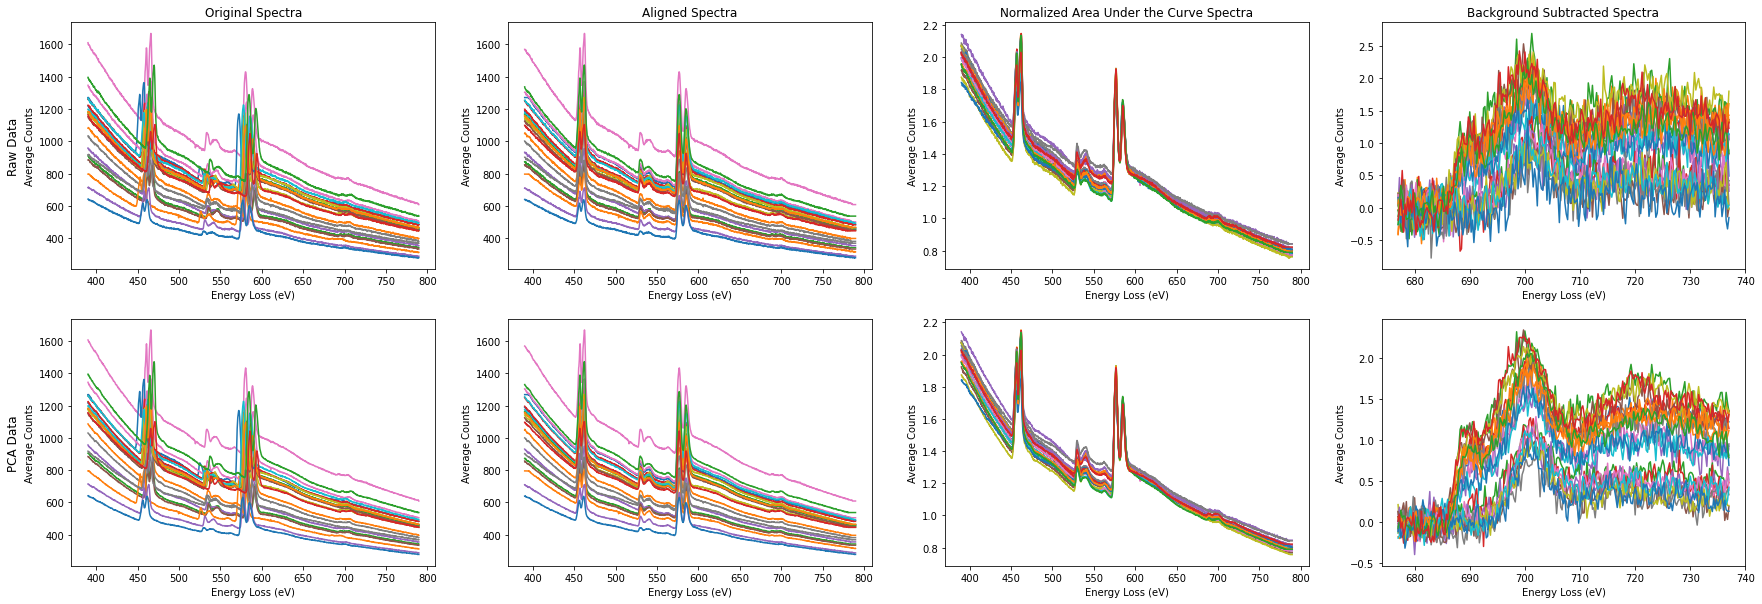

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(30,10))
plotSpectra(axes[0,0], energy_axis, data_X, title='Original Spectra')
plotSpectra(axes[1,0], energy_axis, data_Y)
plotSpectra(axes[0,1], energy_axis, data_X_aligned, title='Aligned Spectra')
plotSpectra(axes[1,1], energy_axis, data_Y_aligned)
plotSpectra(axes[0,2], energy_axis, data_X_aligned_norm, title='Normalized Area Under the Curve Spectra')
plotSpectra(axes[1,2], energy_axis, data_Y_aligned_norm)
plotSpectra(axes[0,3], energy_axis[ind_F], scaleFactor*data_X_processed, title='Background Subtracted Spectra')
plotSpectra(axes[1,3], energy_axis[ind_F], scaleFactor*data_Y_processed)
axes[0,0].annotate('Raw Data', xy=(0, 0.5), xytext=(0 - 5, 0),
                xycoords=axes[0,0].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)
axes[1,1].annotate('PCA Data', xy=(0, 0.5), xytext=(0 - 5, 0),
                xycoords=axes[1,0].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)
plt.show()

In [18]:
if SaveData:
    np.savez_compressed(os.path.join(SAVE_DIR, 'MXene_EELS_Data.npz'), x=data_X_flattened, y=data_X_flattened)
    np.save(os.path.join(SAVE_DIR, 'MXene_EELS_axis.npy'), energy_axis[ind_F][:-1])